In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from IPython.display import display

In [2]:
TRAIN_PATH = Path('data/train_data.csv')

In [3]:
_df = pd.read_csv(TRAIN_PATH)
_df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [4]:
def price_to_class(price: int) -> int:
    return int(price > 350_000) + int(price > 100_000)

df = pd.concat([_df, _df['SalePrice'].rename('class').apply(price_to_class)], axis=1)
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),class
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0,1
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0,2
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0,2
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0,1
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0,2
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0,1


In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

<Axes: ylabel='Count'>

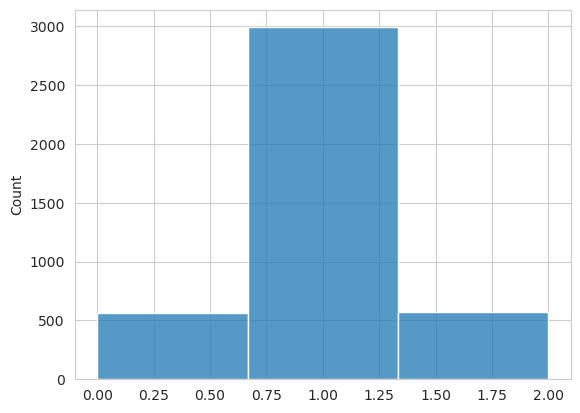

In [6]:
sns.histplot(df['class'].values, bins=3)

In [7]:
df['class'].unique()

array([1, 0, 2])

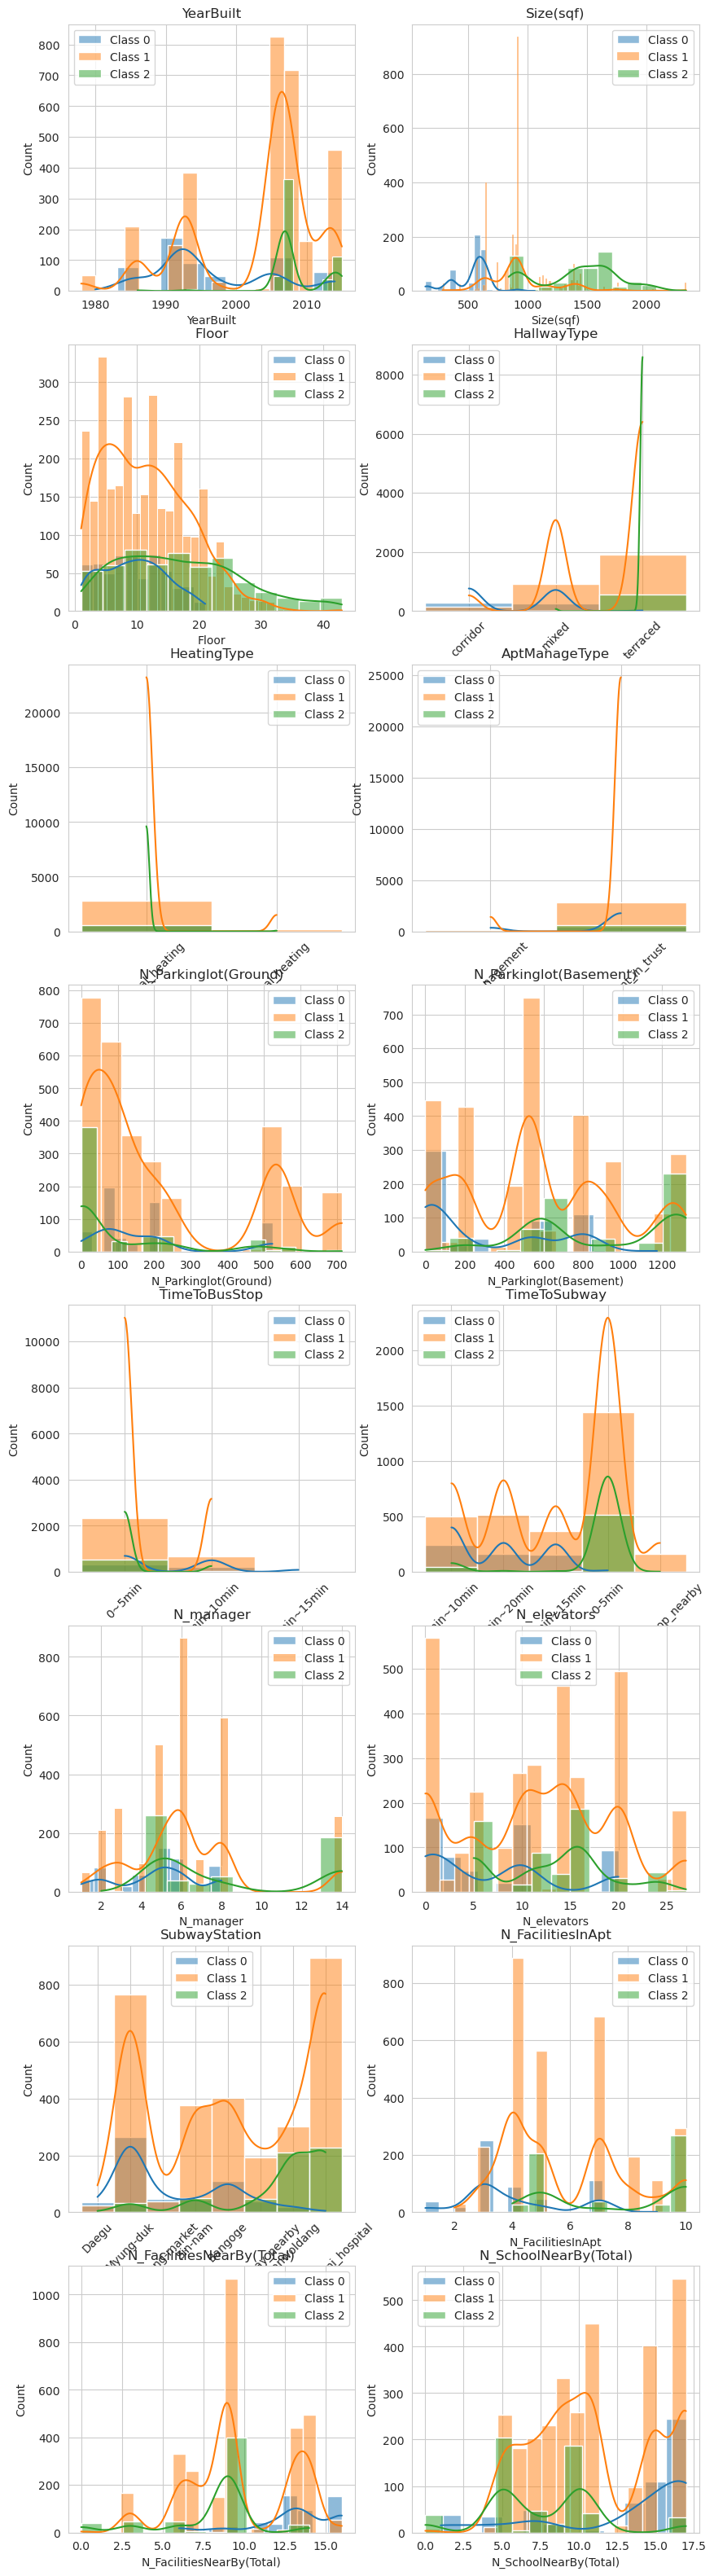

In [13]:
cols = df.drop(columns=['SalePrice', 'class']).columns

fig, axes = plt.subplots(round(len(cols) / 2 + 0.5), 2, )
fig.set_figwidth(10)
fig.set_figheight(len(axes) * 5)

for col, ax in zip(cols, axes.reshape(-1)):
    for c in sorted(df['class'].unique()):
        sns.histplot(df[df['class'] == c][col], ax=ax, alpha=0.5, label=f"Class {c}", kde=True)
        
    if df[col].dtype == object:
        ax.tick_params(axis='x', labelrotation=45)
    ax.legend()
    ax.title.set_text(col)
    
plt.show()

In [21]:
pd.concat([df['TimeToSubway'], df['TimeToSubway'].astype('category').cat.codes], axis=1)

,TimeToSubway,0
0,10min~15min,1
1,5min~10min,3
2,5min~10min,3
3,0-5min,0
4,15min~20min,2
...,...,...
4119,0-5min,0
4120,5min~10min,3
4121,0-5min,0
4122,0-5min,0


In [40]:
aaa = df['TimeToSubway']

pd.concat([aaa, pd.get_dummies(aaa, prefix='TimeToSubway')], axis=1)

,TimeToSubway,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,10min~15min,False,True,False,False,False
1,5min~10min,False,False,False,True,False
2,5min~10min,False,False,False,True,False
3,0-5min,True,False,False,False,False
4,15min~20min,False,False,True,False,False
...,...,...,...,...,...,...
4119,0-5min,True,False,False,False,False
4120,5min~10min,False,False,False,True,False
4121,0-5min,True,False,False,False,False
4122,0-5min,True,False,False,False,False


In [41]:
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),class
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0,1
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0,2
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0,2
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0,1
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0,2
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0,1


In [45]:
categorical_cols = [
    'HallwayType',
    'HeatingType',
    'AptManageType',
    'N_Parkinglot(Ground)',
    'N_Parkinglot(Basement)',
    'TimeToBusStop',
    'TimeToSubway',
    'SubwayStation',
]

pd.concat([df.drop(columns=categorical_cols), *[pd.get_dummies(df[col], prefix=col, dtype=int) for col in categorical_cols]], axis=1)

,SalePrice,YearBuilt,Size(sqf),Floor,N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),class,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,141592,2006,814,3,3.0,0.0,5,6.0,9.0,1,...,0,0,0,0,0,0,1,0,0,0
1,51327,1985,587,8,2.0,2.0,3,12.0,4.0,0,...,1,0,0,0,0,1,0,0,0,0
2,48672,1985,587,6,2.0,2.0,3,12.0,4.0,0,...,1,0,0,0,0,1,0,0,0,0
3,380530,2006,2056,8,5.0,11.0,5,3.0,7.0,2,...,0,0,0,0,0,0,0,0,1,0
4,78318,1992,644,2,4.0,8.0,3,9.0,14.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,14.0,16.0,10,9.0,10.0,2,...,0,0,0,0,0,0,1,0,0,0
4120,307079,2015,644,22,5.0,10.0,7,7.0,11.0,1,...,1,0,0,0,0,1,0,0,0,0
4121,357522,2007,868,20,14.0,16.0,10,9.0,10.0,2,...,0,0,0,0,0,0,1,0,0,0
4122,312389,1978,1327,1,1.0,4.0,3,7.0,11.0,1,...,0,0,0,0,0,0,1,0,0,0
